# Regression and Deep Learning with Neural Networks

In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

In [2]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
X_fruits_2d.head()

,height,width
0,7.3,8.4
1,6.8,8.0
2,7.2,7.4
3,4.7,6.2
4,4.6,6.0


In [4]:
y_fruits_2d.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

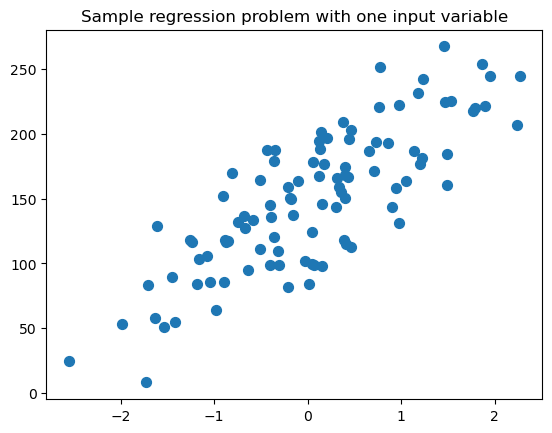

In [5]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

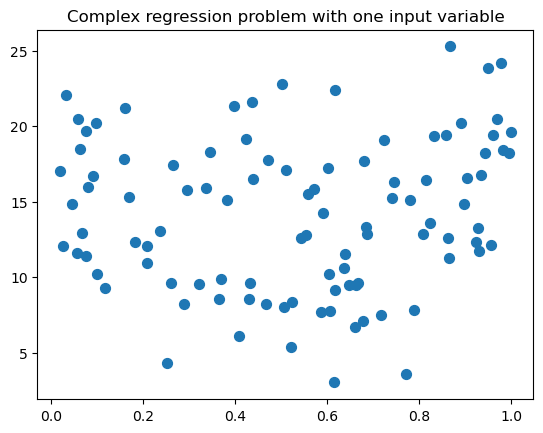

In [6]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

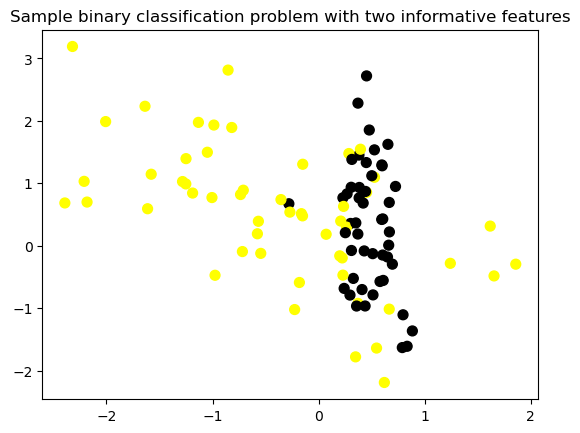

In [7]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

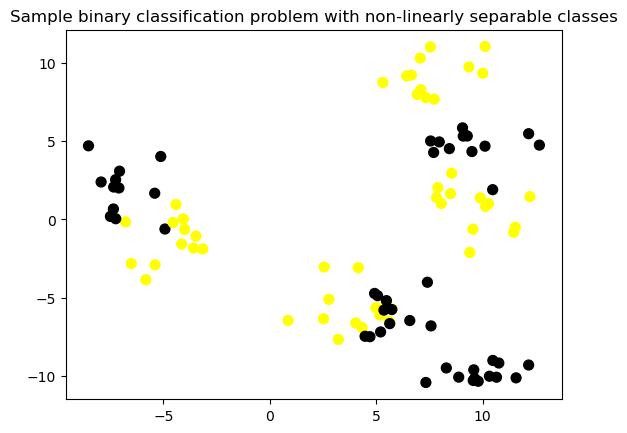

In [8]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

## Logistic Regression

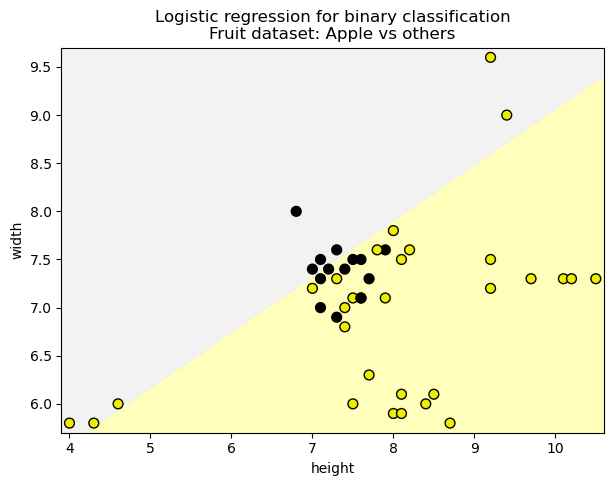

In [9]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else

# Apply stratify to ensure that the training and test sets have the same proportion of classes
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                stratify = y_fruits_apple.values,
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)
subaxes.set_xlabel('height')
subaxes.set_ylabel('width');

In [10]:
# As was menntioned, the classes are disproportionate
y_fruits_apple.value_counts()

fruit_label
False    40
True     19
Name: count, dtype: int64

In [11]:
h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))

h = 10
w = 7
# Casting the predicted value to an integer
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][int(clf.predict([[h,w]])[0])]))


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.66
Accuracy of Logistic regression classifier on test set: 0.60


Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


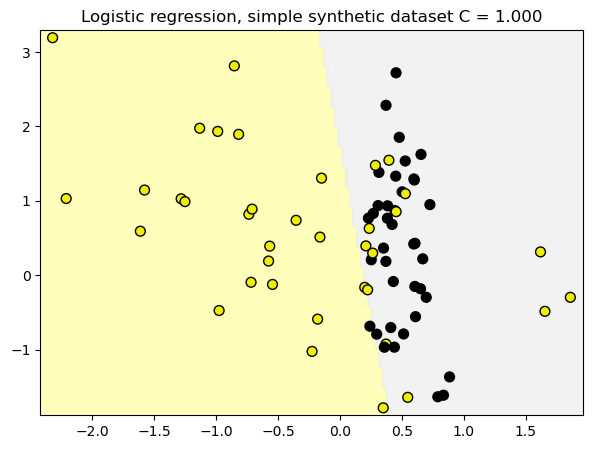

In [12]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

# Dataset cancer is really balanced, so it's not necessary specifying stratify
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

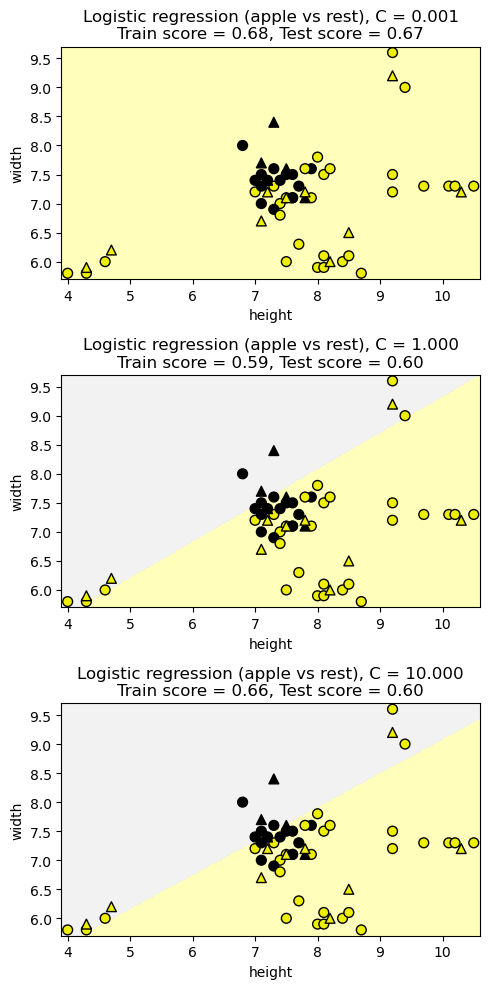

In [13]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                stratify = y_fruits_apple.values,
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(5, 10))

for this_C, subplot in zip([0.001, 1, 10], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
    subplot.set_xlabel('height')
    subplot.set_ylabel('width')

plt.tight_layout()

Best C parameter: 40.370173
Best cross-validation accuracy: 0.7028
Test set accuracy with best C: 0.6000


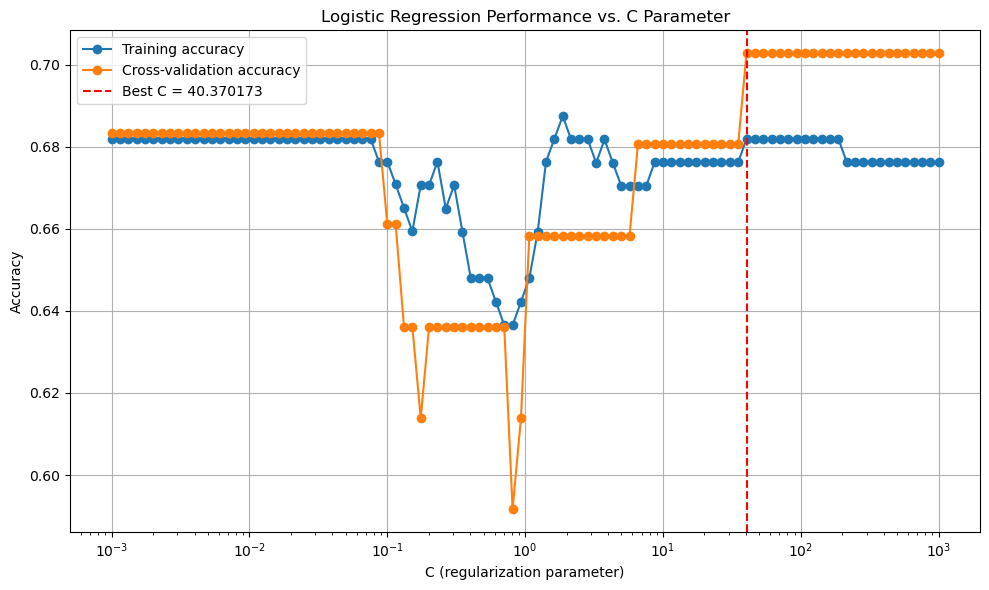

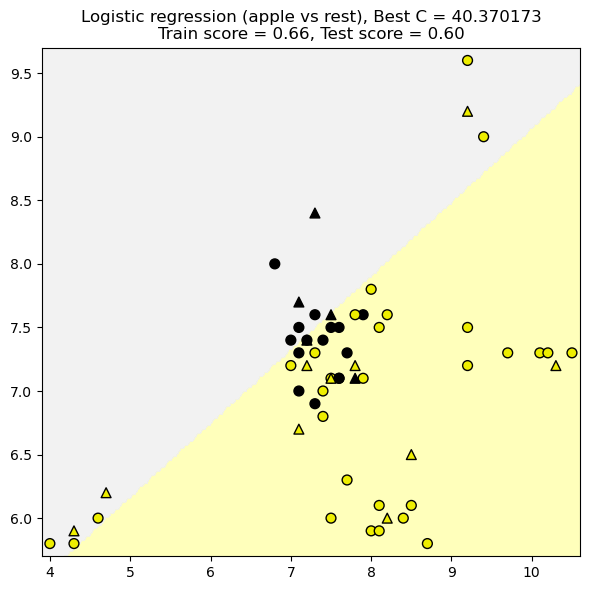

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid = {'C': np.logspace(-3, 3, 100)}  # Testing C values from 0.001 to 1000

# Create a logistic regression model
logreg = LogisticRegression(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter and score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C parameter: {best_C:.6f}")
print(f"Best cross-validation accuracy: {best_score:.4f}")
print(f"Test set accuracy with best C: {grid_search.score(X_test, y_test):.4f}")

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
C_values = param_grid['C']
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(C_values, train_scores, label='Training accuracy', marker='o')
plt.semilogx(C_values, test_scores, label='Cross-validation accuracy', marker='o')
plt.axvline(x=best_C, color='red', linestyle='--', label=f'Best C = {best_C:.6f}')

plt.xlabel('C (regularization parameter)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Performance vs. C Parameter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the decision boundary with the best C
best_clf = LogisticRegression(C=best_C, random_state=0).fit(X_train, y_train)
title = f'Logistic regression (apple vs rest), Best C = {best_C:.6f}'

fig, ax = plt.subplots(figsize=(6, 6))
plot_class_regions_for_classifier_subplot(best_clf, X_train, y_train, 
                                         X_test, y_test, title, ax)
plt.tight_layout()
plt.show()

Best C parameter: 506.157689
Best cross-validation accuracy: 0.7028
Test set accuracy with best C: 0.6000


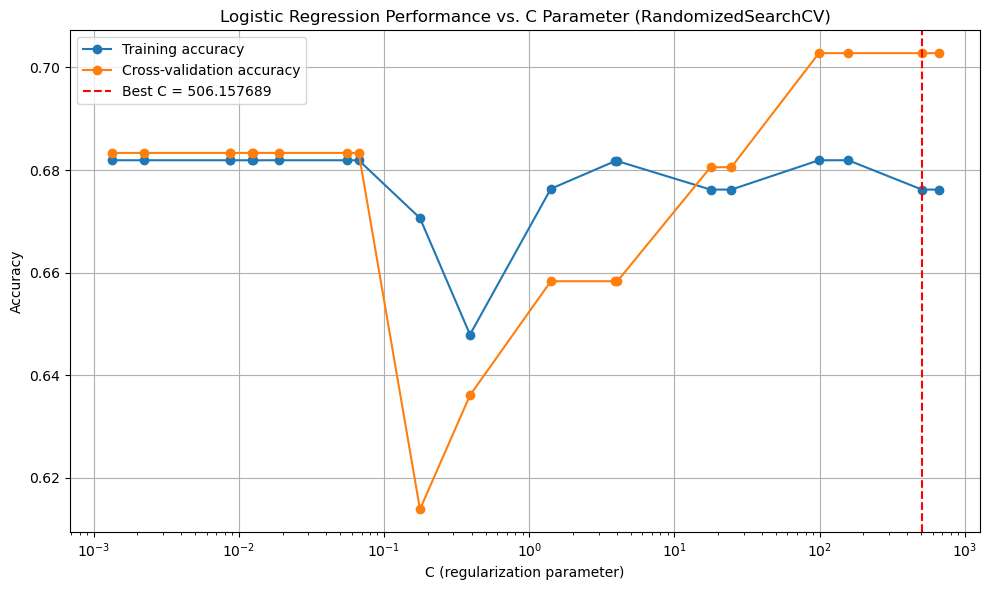

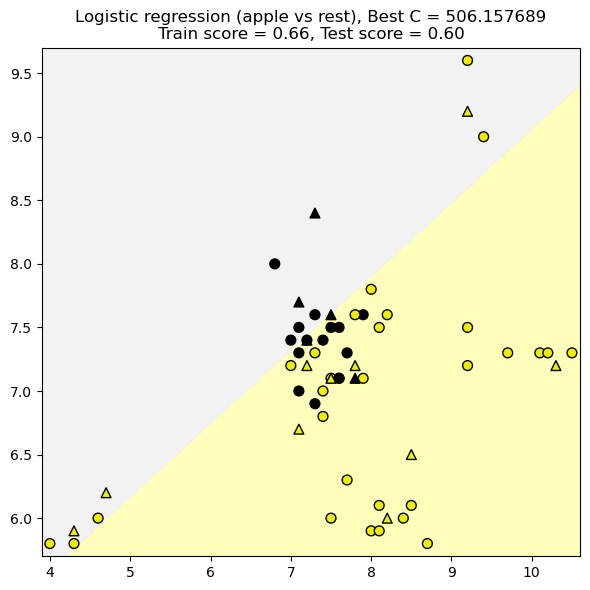

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, loguniform

# Define the parameter distribution to sample from
# Using loguniform distribution for C (equivalent to sampling uniformly in log space)
param_dist = {'C': loguniform(1e-3, 1e3)}  # C values from 0.001 to 1000

# Create a logistic regression model
logreg = LogisticRegression(random_state=0)

# Set up RandomizedSearchCV
# n_iter controls how many parameter settings are sampled
random_search = RandomizedSearchCV(
    logreg, 
    param_distributions=param_dist,
    n_iter=20,  # Try 20 different C values
    cv=5, 
    scoring='accuracy',
    return_train_score=True,
    random_state=42  # For reproducibility
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameter and score
best_C = random_search.best_params_['C']
best_score = random_search.best_score_

print(f"Best C parameter: {best_C:.6f}")
print(f"Best cross-validation accuracy: {best_score:.4f}")
print(f"Test set accuracy with best C: {random_search.score(X_test, y_test):.4f}")

# Extract results and sort by C value for plotting
results = random_search.cv_results_
C_values = results['param_C'].data
indices = np.argsort(C_values)
sorted_C = C_values[indices]
sorted_train_scores = results['mean_train_score'][indices]
sorted_test_scores = results['mean_test_score'][indices]

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.semilogx(sorted_C, sorted_train_scores, label='Training accuracy', marker='o')
plt.semilogx(sorted_C, sorted_test_scores, label='Cross-validation accuracy', marker='o')
plt.axvline(x=best_C, color='red', linestyle='--', label=f'Best C = {best_C:.6f}')

plt.xlabel('C (regularization parameter)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Performance vs. C Parameter (RandomizedSearchCV)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the decision boundary with the best C
best_clf = LogisticRegression(C=best_C, random_state=0).fit(X_train, y_train)
title = f'Logistic regression (apple vs rest), Best C = {best_C:.6f}'

fig, ax = plt.subplots(figsize=(6, 6))
plot_class_regions_for_classifier_subplot(best_clf, X_train, y_train, 
                                         X_test, y_test, title, ax)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression(max_iter=100000, C=10).fit(X_train, y_train)

#clf = LogisticRegression(C=10).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.97


Best C parameter: 1000
Best cross-validation accuracy: 0.9718
Test set accuracy with best C: 0.9510
Original model (C=10) test accuracy: 0.9650

Breast cancer dataset (with optimized C)
Accuracy of Logistic regression classifier on test set: 0.9510


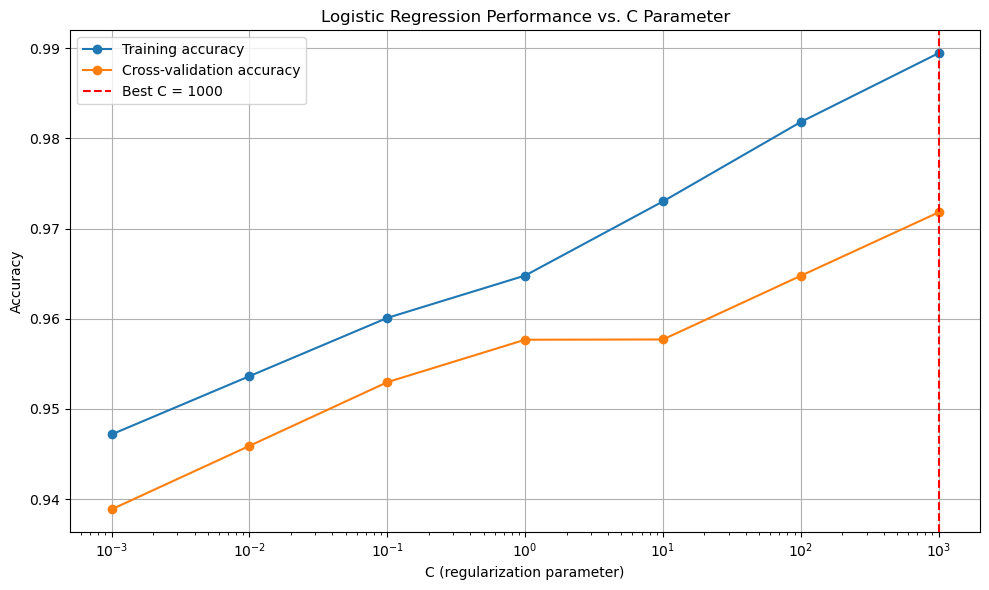

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a logistic regression model with increased max_iter to ensure convergence
logreg = LogisticRegression(max_iter=100000)

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter and score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C parameter: {best_C}")
print(f"Best cross-validation accuracy: {best_score:.4f}")
print(f"Test set accuracy with best C: {grid_search.score(X_test, y_test):.4f}")

# Compare with original model (C=10)
original_model = LogisticRegression(C=10, max_iter=100000).fit(X_train, y_train)
print(f"Original model (C=10) test accuracy: {original_model.score(X_test, y_test):.4f}")

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
C_values = param_grid['C']
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(C_values, train_scores, label='Training accuracy', marker='o')
plt.semilogx(C_values, test_scores, label='Cross-validation accuracy', marker='o')
plt.axvline(x=best_C, color='red', linestyle='--', label=f'Best C = {best_C}')

plt.xlabel('C (regularization parameter)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Performance vs. C Parameter')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Create a model with the best C value
best_model = LogisticRegression(C=best_C, max_iter=100000).fit(X_train, y_train)

# Print detailed results
print('\nBreast cancer dataset (with optimized C)')

print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(best_model.score(X_test, y_test)))


## Neural networks

#### Activation functions

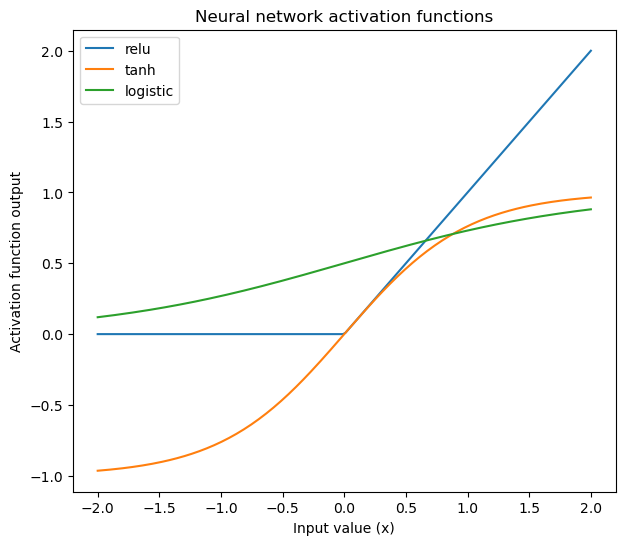

In [18]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

#### Synthetic dataset 1: single hidden layer

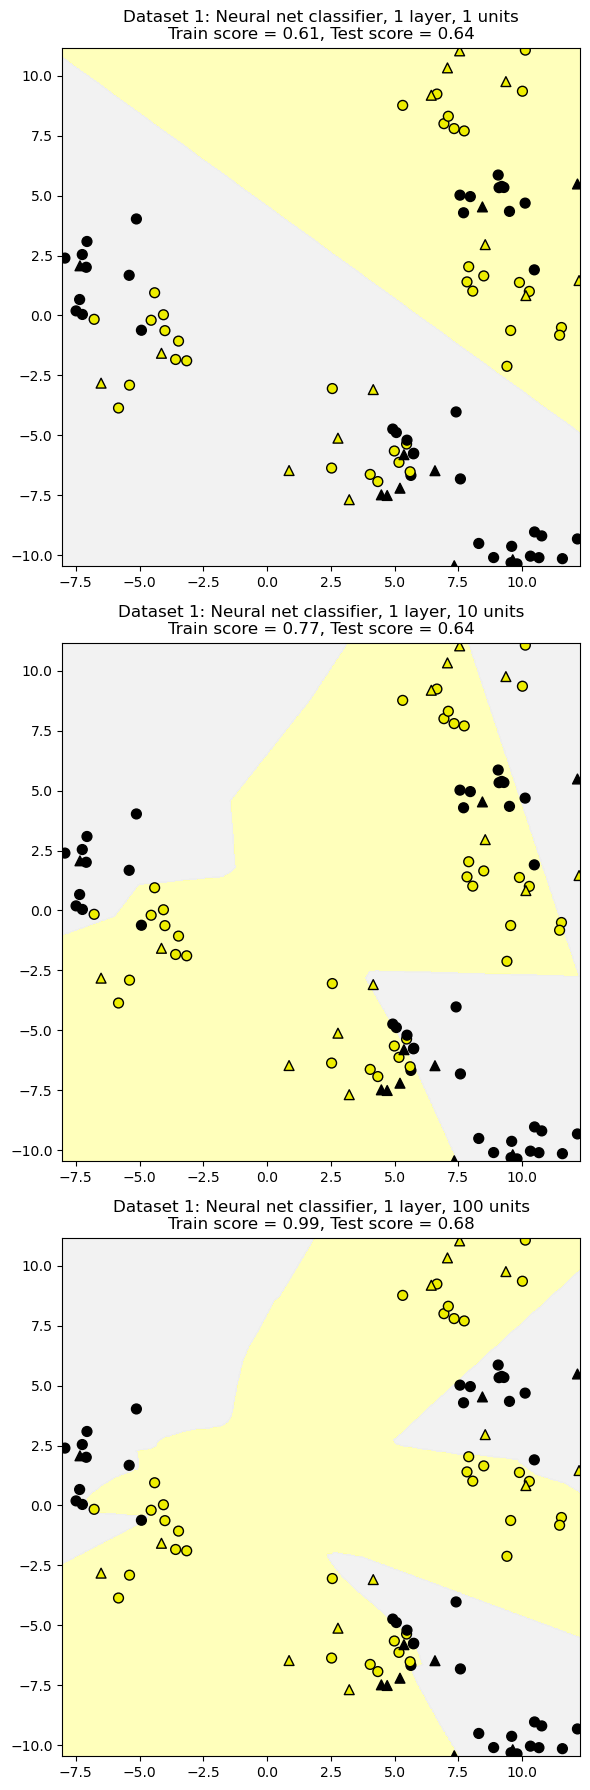

In [ ]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
      
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs', max_iter=1000,
                          random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

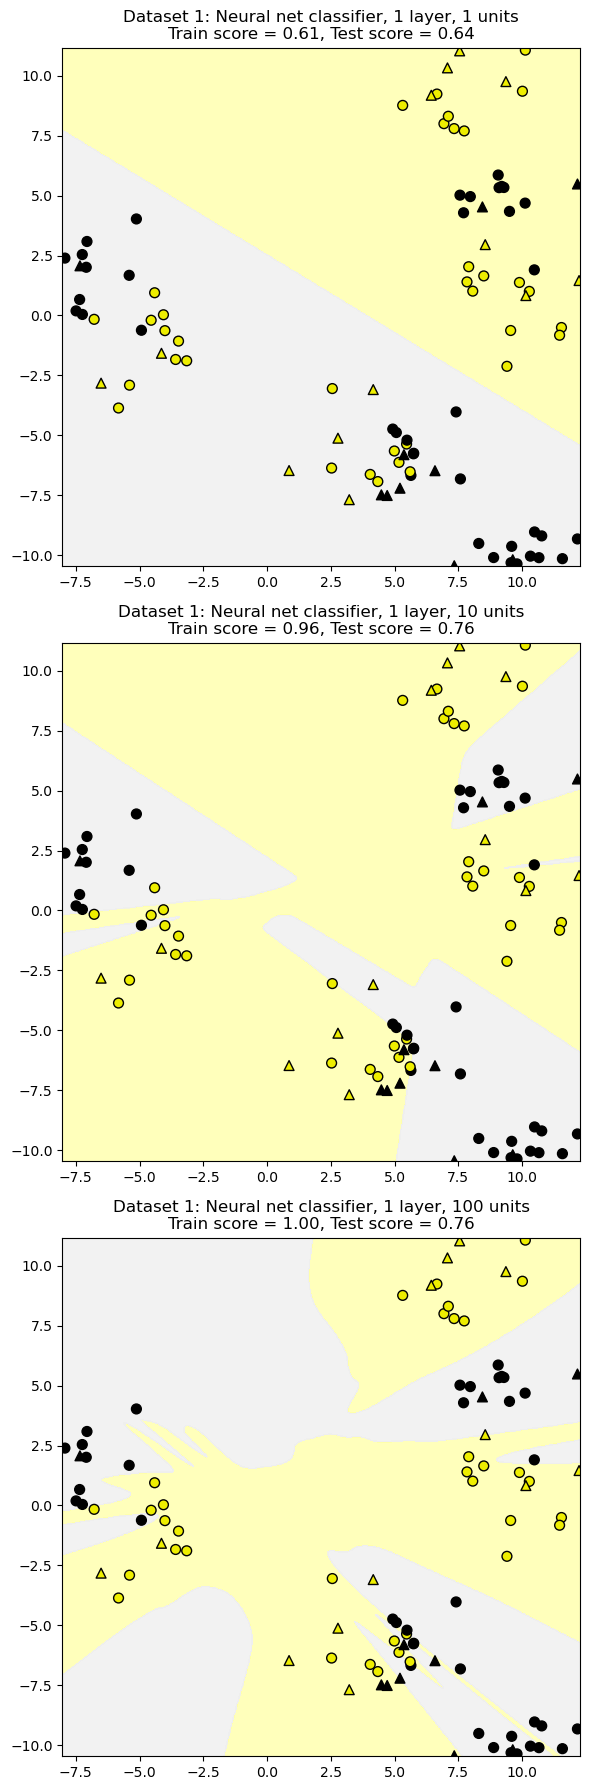

In [ ]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
      
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs', max_iter=10000,  activation='tanh', 
                          random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Synthetic dataset 1: two hidden layers

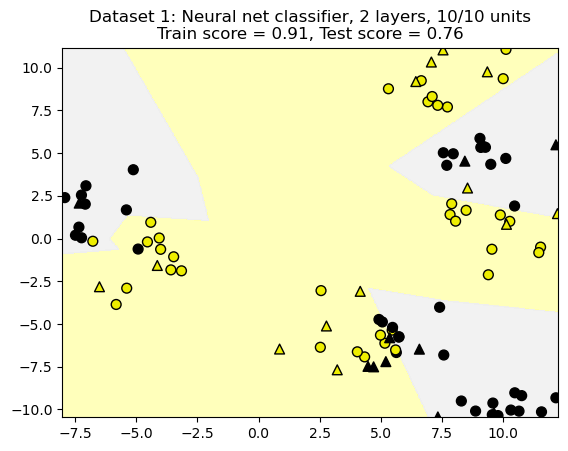

In [21]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs', max_iter=1000,
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: $\alpha$

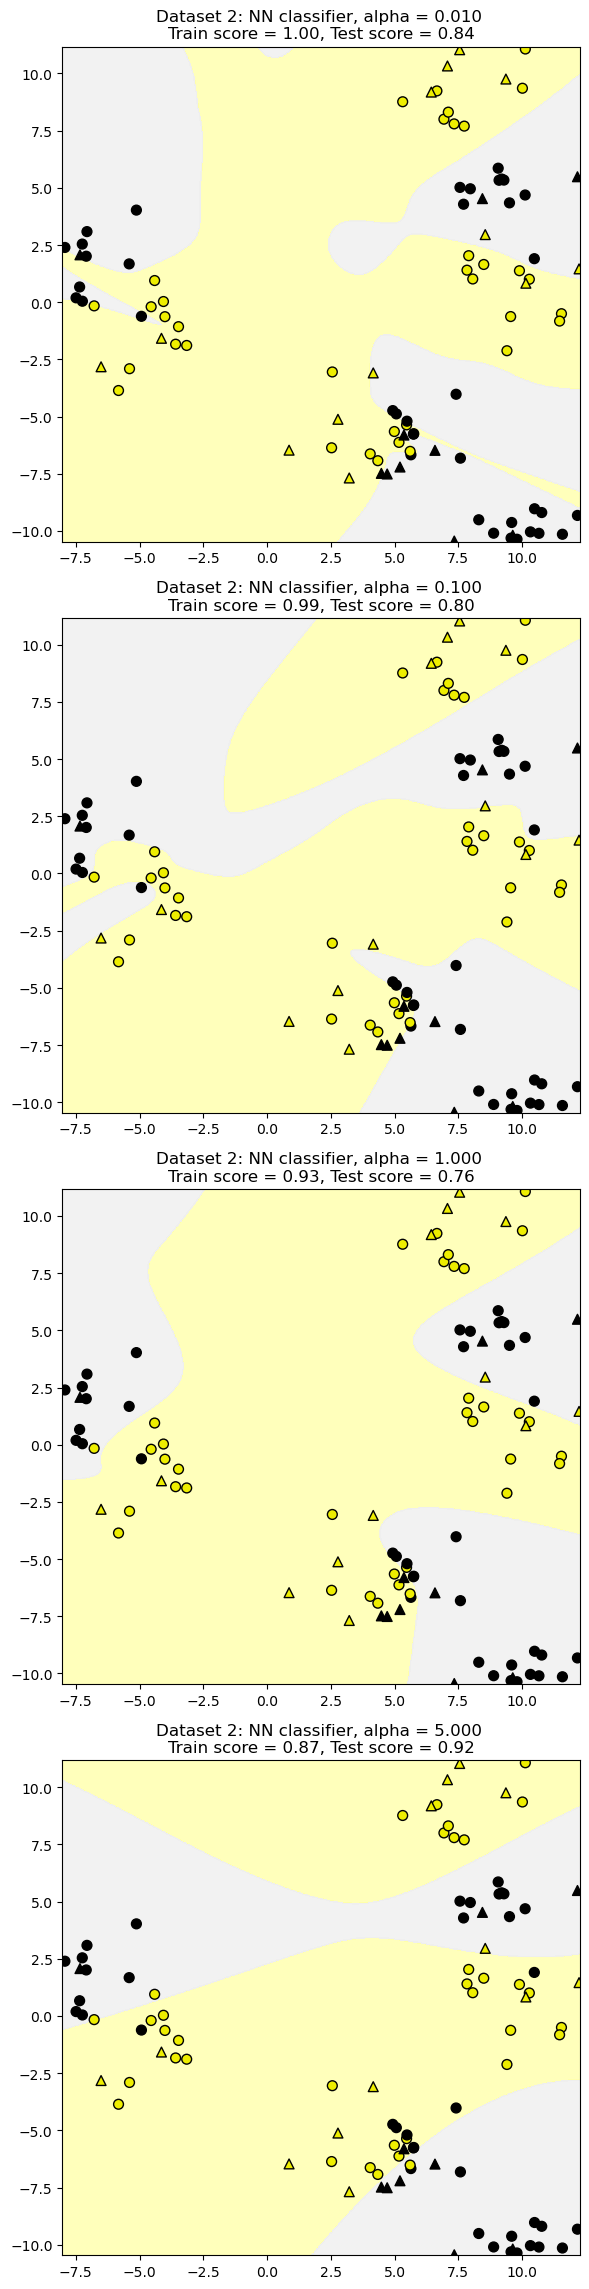

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100], max_iter=10000,
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Graphic of Loss Function
Loss function can be obtained using attribute `.loss_curve_`.

**NOTE:** It's important clarify that the GridSearchCV was done with *logistic* as activation function, and parameters with it were used in another model with *ReLu*.

Best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Best cross-validation accuracy: 0.7200
Test set accuracy with best parameters: 0.8000

Breast cancer dataset (with sigmoid activation)
Accuracy of MLP classifier on training set: 0.8800
Accuracy of MLP classifier on test set: 0.8000

Comparison with ReLU activation:
Accuracy of MLP with ReLU on training set: 0.9067
Accuracy of MLP with ReLU on test set: 0.7600


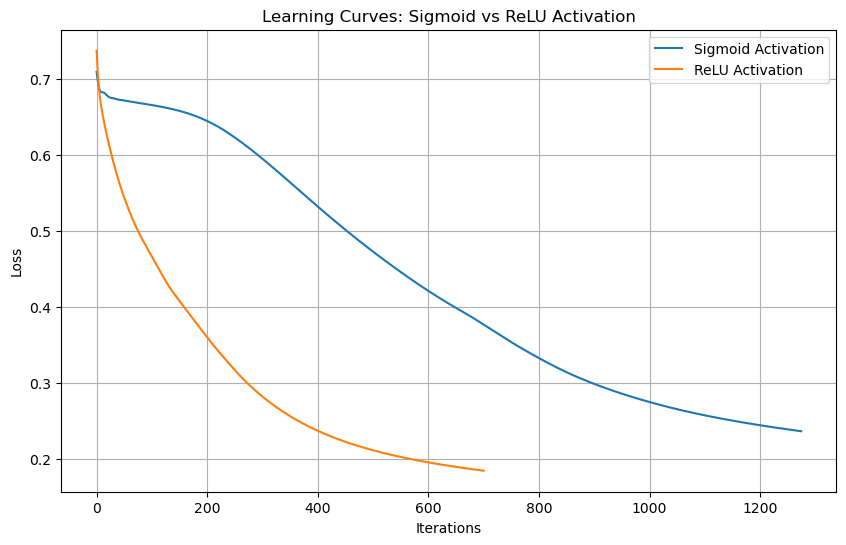

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Create an MLP (Multi-Layer Perceptron) with sigmoid activation
# Default activation in MLPClassifier is 'relu', we'll change it to 'logistic' (sigmoid)
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='logistic',      # 'logistic' is sklearn's name for the sigmoid activation
    solver='adam',
    max_iter=10000,
    random_state=0
)

# Define parameter grid for optimization
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  # Regularization parameter
    'hidden_layer_sizes': [(50,), (100,), (50, 50)]  # Different network architectures
}

# Set up GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")
print(f"Test set accuracy with best parameters: {grid_search.score(X_test, y_test):.4f}")

# Create a model with the best parameters
best_mlp = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation='logistic',  # Sigmoid activation
    alpha=best_params['alpha'],
    solver='adam',
    max_iter=10000,
    random_state=0
)

best_mlp.fit(X_train, y_train)

# Print detailed results
print('\nBreast cancer dataset (with sigmoid activation)')
print('Accuracy of MLP classifier on training set: {:.4f}'
     .format(best_mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.4f}'
     .format(best_mlp.score(X_test, y_test)))

# Compare with ReLU activation
relu_mlp = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation='relu',  # ReLU activation
    alpha=best_params['alpha'],
    solver='adam',
    max_iter=10000,
    random_state=0
)

relu_mlp.fit(X_train, y_train)

print('\nComparison with ReLU activation:')
print('Accuracy of MLP with ReLU on training set: {:.4f}'
     .format(relu_mlp.score(X_train, y_train)))
print('Accuracy of MLP with ReLU on test set: {:.4f}'
     .format(relu_mlp.score(X_test, y_test)))

# Plot learning curves for sigmoid activation
plt.figure(figsize=(10, 6))
plt.plot(best_mlp.loss_curve_, label='Sigmoid Activation')
if hasattr(relu_mlp, 'loss_curve_'):
    plt.plot(relu_mlp.loss_curve_, label='ReLU Activation')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Learning Curves: Sigmoid vs ReLU Activation')
plt.legend()
plt.grid(True)
plt.show()

#### The effect of different choices of activation function

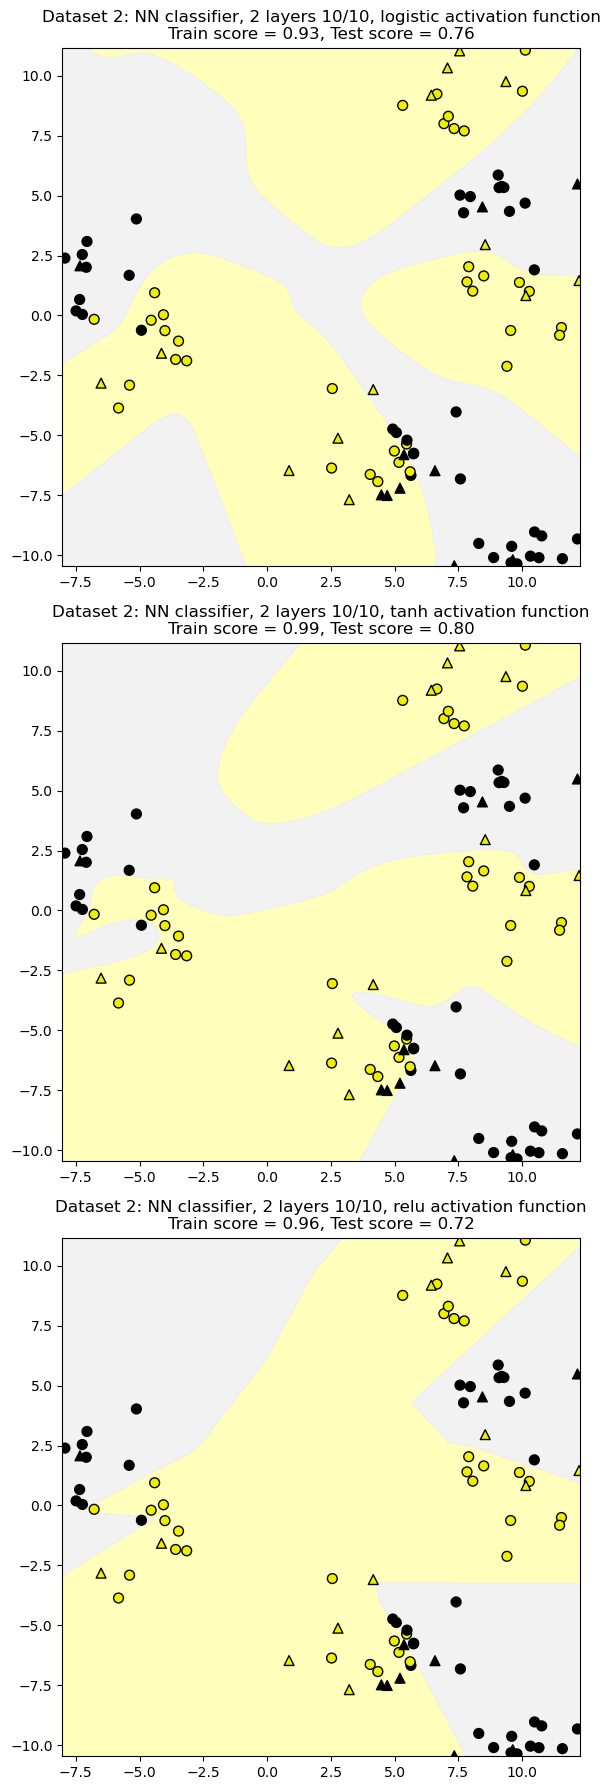

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10], max_iter=5000,
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### The effect of normalize data

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

# Define and train a Multi-Layer Perceptron classifier WITHOUT normalization
clf_no_scaling = MLPClassifier(hidden_layer_sizes=[100, 100], alpha=5.0, max_iter=2000,
                               random_state=0, solver='lbfgs').fit(X_train, y_train)

# Print accuracy
print('Breast cancer dataset (No Normalization)')
print('Accuracy of NN classifier on training set: {:.2f}'.format(clf_no_scaling.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'.format(clf_no_scaling.score(X_test, y_test)))

# But in this case of breast cancer dataset, the best metric is not accuracy, is recall
from sklearn.metrics import recall_score

print('Breast cancer dataset (No Normalization)')
print('Recall of NN classifier on training set: {:.2f}'.format(recall_score(y_train, clf_no_scaling.predict(X_train))))
print('Recall of NN classifier on test set: {:.2f}'.format(recall_score(y_test, clf_no_scaling.predict(X_test))))

Breast cancer dataset (No Normalization)
Accuracy of NN classifier on training set: 0.95
Accuracy of NN classifier on test set: 0.94
Breast cancer dataset (No Normalization)
Recall of NN classifier on training set: 0.96
Recall of NN classifier on test set: 0.92


In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Initialize scaler
scaler = MinMaxScaler()

# Split dataset into training and test sets
# MUCH FASTER CONVERGENCE WHEN USING NORMALIZED DATA...

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

# Scale the features using MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train a Multi-Layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes=[5, 5], alpha=5.0,
                    random_state=0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))
# Print recall
print('Recall of NN classifier on training set: {:.2f}'.format(recall_score(y_train, clf.predict(X_train_scaled))))
print('Recall of NN classifier on test set: {:.2f}'.format(recall_score(y_test, clf.predict(X_test_scaled))))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97
Recall of NN classifier on training set: 1.00
Recall of NN classifier on test set: 0.99


As we can see, applying data normalization allowed the model to improve its metrics. It is not overfitting because the Precision is not 1.0, but the Recall in training is perfect and in the test it is almost perfect. In addition, the model is much simpler, with fewer neurons per layer and fewer iterations.

### Neural networks: Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


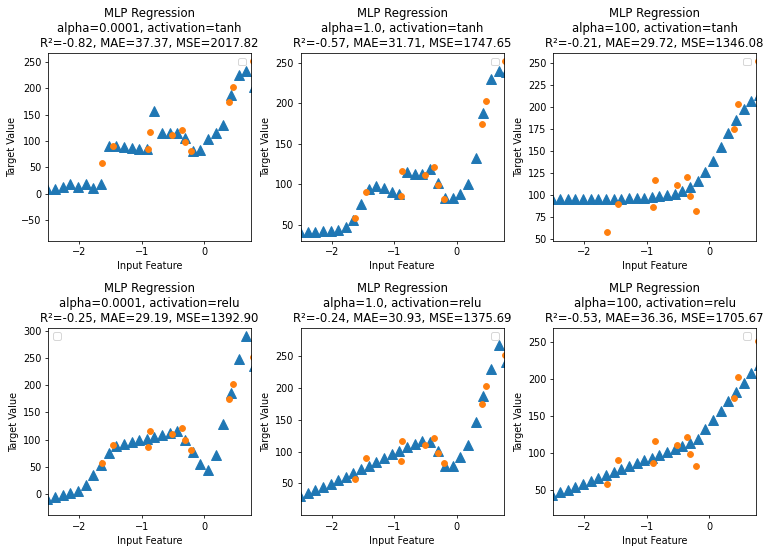

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha, max_iter=5000,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)

          # Generate predictions for test set (for metrics calculation)
        y_test_pred = mlpreg.predict(X_test)

        
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

        r2 = r2_score(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        mse = mean_squared_error(y_test, y_test_pred)

        # Set labels and title
        thisaxis.set_xlabel('Input Feature')
        thisaxis.set_ylabel('Target Value')
        thisaxis.set_title(f"MLP Regression\nalpha={thisalpha}, activation={thisactivation}\nR²={r2:.2f}, MAE={mae:.2f}, MSE={mse:.2f}")
        thisaxis.legend()


In [ ]:
pip install keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# 1. Data preparation
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de los datos
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Convertir etiquetas a formato categórico (One-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 2. Model definition
network = keras.models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# 3. Model compilation
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# 4. Model training
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# 5. Model evaluation
test_loss, test_acc = network.evaluate(test_images, test_labels)

# Mostrar precisión en el conjunto de prueba
print(f'Test accuracy: {test_acc:.4f}')
